In [1]:
import pandas as pd

## 웹에서 titanic.csv 파일 읽어오기

In [2]:
url = 'https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv'
titanic = pd.read_csv(url)

## 데이터 파악

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [4]:
# 컬럼명 확인
titanic.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

## 전처리

In [5]:
# 결측치 확인
titanic.isna().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [7]:
# 컬럼명 변경 : Sex -> Gender
titanic.rename(columns={'Sex' : 'Gender'}, inplace=True)

## titanic.csv 파일 저장

In [32]:
titanic.to_csv('titanic.csv', index=False, encoding='UTF-8')
print('저장 완료')

저장 완료


## titanic.csv 파일 읽어오기

In [8]:
titanic = pd.read_csv('titanic.csv')

## 가설
- 무엇을 분석할 것인가? 
1. 생존자의 성별 비율은 비슷할 것이다.
2. 1등실 승객의 생존율이 높았을 것이다.
3. 사망자는 고령자가 많았을 것이다.

### [가설 1] 생존자의 성별 비율은 비슷할 것이다.

#### 분석 : 첫 번째 방법

In [9]:
# 생존자 성별 인원 수
survived_gender = titanic[titanic.Survived ==1].groupby('Gender').size()
survived_gender

Gender
female    233
male      109
dtype: int64

In [35]:
# 생존자 성별 비율
survived_gender / survived_gender.sum() * 100

Gender
female    68.128655
male      31.871345
dtype: float64

#### 분석 : 두 번째 방법

In [36]:
titanic[titanic.Survived == 1].Gender.value_counts(normalize=True) * 100

Gender
female    68.128655
male      31.871345
Name: proportion, dtype: float64

In [18]:
# 성별별 사망자와 생존자 비율
g_s = titanic.groupby('Gender').Survived.value_counts(normalize=True).sort_index() * 100
g_s

Gender  Survived
female  0           25.796178
        1           74.203822
male    0           80.977312
        1           19.022688
Name: proportion, dtype: float64

#### 시각화

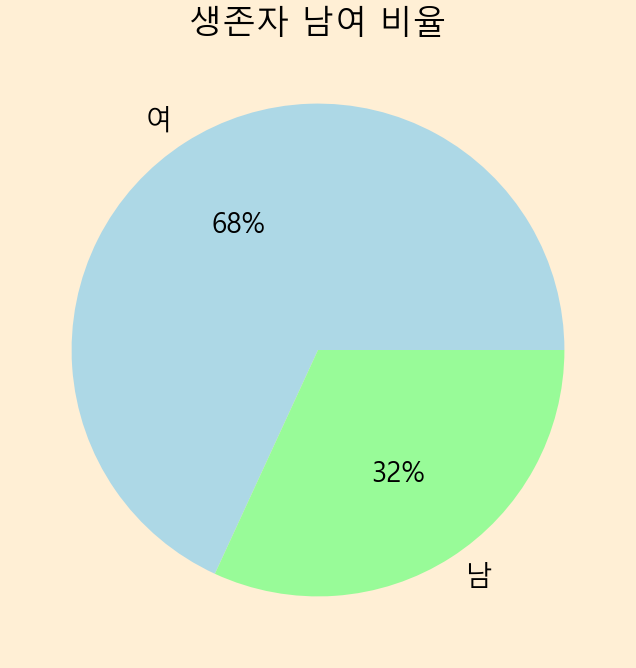

In [19]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rc('font', size=20) # 글자 사이즈

plt.figure(figsize=(8, 8), facecolor='papayawhip')  #facecolor : 배경색 설정
plt.title('생존자 남여 비율') 

plt.pie(survived_gender, 
        labels=['여', '남'], 
        autopct='%.f%%', 
        colors=['lightblue', 'palegreen'],
       )

# plt.show()

# 저장 시에는 plt.show가 있으면 저장 안 됨
plt.savefig('생존자 남여 비율.jpg', dpi=100)   #dpi : 사진 사이즈 키우기

#### 결론
- [가설 1] 생존자의 성별 비율은 비슷할 것이다.
    - 생존자 342명 중 여자는 233명(68%), 남자는 109명(32%)으로 여자가 남자의 2배 이상으로 나타났다.

### [가설 2] 1등실 승객의 생존율이 높았을 것이다.

#### 분석

In [20]:
g_pclass_survived = titanic.groupby(['Pclass', 'Survived']).size().unstack()
g_pclass_survived

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,368,119


In [21]:
g_pclass_survived['합'] = g_pclass_survived.sum(axis=1)
g_pclass_survived

Survived,0,1,합
Pclass,,,
1,80,136,216
2,97,87,184
3,368,119,487


In [22]:
g_pclass_survived['사망자 비율'] = g_pclass_survived[0] / g_pclass_survived.합
g_pclass_survived

Survived,0,1,합,사망자 비율
Pclass,,,,
1,80,136,216,0.370370
2,97,87,184,0.527174
3,368,119,487,0.755647


In [23]:
g_pclass_survived['생존자 비율'] = g_pclass_survived[1] / g_pclass_survived.합
g_pclass_survived

Survived,0,1,합,사망자 비율,생존자 비율
Pclass,,,,,
1,80,136,216,0.370370,0.629630
2,97,87,184,0.527174,0.472826
3,368,119,487,0.755647,0.244353


In [24]:
titanic.groupby('Pclass').Survived.value_counts(normalize=True).unstack()

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.755647,0.244353


#### 시각화

In [25]:
# 행, 열 바꾸기
g_pclass_survived[[0,1]].transpose()
g_pclass_survived[[0,1]].T

Pclass,1,2,3
Survived,,,
0,80,97,368
1,136,87,119


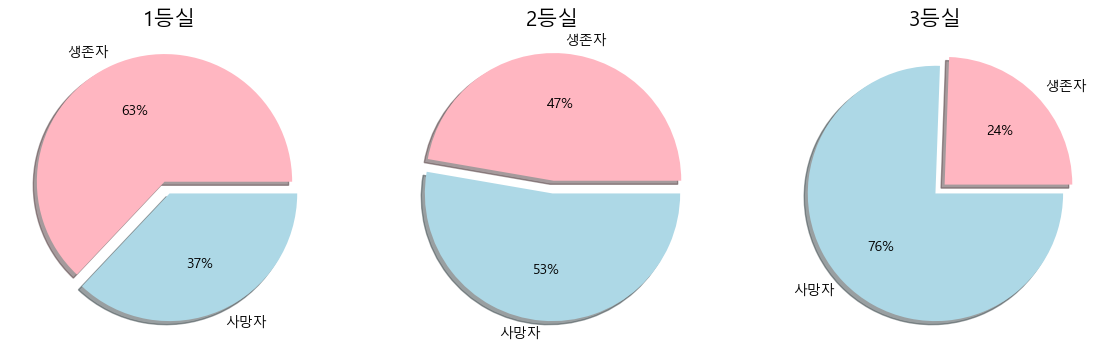

In [26]:
plt.rc('font', family='Malgun Gothic')
plt.rc('font', size=10)
plt.rc('axes', titlesize=15) # title 사이즈 설정

g_pclass_survived[[0,1]].T.plot(
    kind='pie',
    subplots=True,
    ylabel='', # ylabel 지우기
    legend=False,   # 범례 지우기
    autopct='%.f%%',
    labels=['사망자', '생존자'],
    counterclock=False,   #시계방향으로 변경
    colors=['lightblue', 'lightpink'],
    title=['1등실', '2등실', '3등실'],
    explode=[0, 0.1],
    shadow=True,
    figsize=(14, 14),
)

plt.savefig('각 등실의 생존자와 사망자 비율.png')

#### 결론
- [가설 2] 1등실 승객의 생존율이 높았을 것이다.
    - 1등실 승객 216명 중 136명이 생존하여, 1등실 승객은 약 63%가 생존하였다.
    - 2등실 승객 184명 중 87명이 생존하여, 2등실 승객은 약 47%가 생존하였다.
    - 3등실 승객 487명 중 119명이 생존하여, 3등실 승객은 약 24%가 생존하였다.  
    - 생존율은 1등실이 약 63%로 가장 높았다.

### [가설 3] 사망자는 고령자가 많았을 것이다.
- “고령자”란 55세 이상인 사람을 말합니다
- 「고용상 연령차별금지 및 고령자고용촉진에 관한 법률」 제2조제1호 
- 「고용상 연령차별금지 및 고령자고용촉진에 관한 법률 시행령」 제2조제1항

#### 분석

In [27]:
# 연속형(continuous values) -> 범주형(categorical values)
# 범주 : 55세 미만, 55세 이상

# [방법 1] 직접 레이블링
# 레이블링(labeling) : 분류된 데이터나 정보에 이름(label)을 붙이는 것
# 55세 미만 : A , 55세 이상 : B

# 1-1. 모든 값이 0인 AgeBand 컬럼 추가
titanic['AgeBand'] = 0

titanic.loc[titanic.Age < 55, 'AgeBand'] = 'A'
titanic.loc[titanic.Age >= 55, 'AgeBand'] = 'B'

In [28]:
# [방법 2] cut() 함수 
titanic['AgeCut'] = pd.cut(titanic.Age, bins=[0, 54, 80], labels=['A', 'B'])

In [29]:
# 사망자 데이터 추출
g_agecut = titanic[titanic.Survived == 0].groupby('AgeCut').size().to_frame()  #to_frame : frame으로 변경해줌

In [30]:
g_agecut['rate'] = g_agecut / g_agecut.sum()

In [31]:
g_agecut.loc['합'] = g_agecut.sum()
g_agecut

,0,rate
AgeCut,,
A,509.0,0.933945
B,36.0,0.066055
합,545.0,1.000000


In [32]:
# 컬럼 0 타입 변경 : float -> int
g_agecut[0] = g_agecut[0].astype(int)
g_agecut

,0,rate
AgeCut,,
A,509,0.933945
B,36,0.066055
합,545,1.000000


#### 시각화

<Axes: title={'center': '사망자 중 고령자 비율'}>

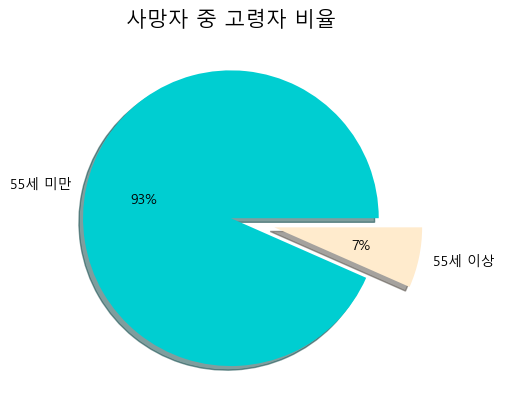

In [33]:
g_agecut[0][:2].plot(
    kind='pie',
    ylabel='',
    labels=['55세 미만', '55세 이상'],
    autopct='%.f%%',
    title='사망자 중 고령자 비율',
    explode=[0, 0.3],
    shadow=True,
    colors=['DarkTurquoise','BlanchedAlmond'],
)

#### 결론
- [가설 3] 사망자는 고령자가 많았을 것이다.
    - 사망자 총 545명 중 고령자는 36명(약 7%)으로 나타났다.
    - 사망자의 대부분은 고령자가 아닌 55세 미만(약 93%)으로 나타났다.